In [1]:
from netCDF4 import Dataset
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy.signal import argrelextrema
import pickle
import warnings

In [2]:
directory = '../data/PROCESSED'

In [3]:
def get_time_ticks(times):
    seconds = [t.second for t in times]
    hours = [t.hour for t in times]
    minutes = [t.minute for t in times]
    time_ticks = [f'{h}:{str(m).zfill(2)}:{str(s).zfill(2)}' for h,m,s in zip(hours, minutes, seconds)]
    return time_ticks

pits = {}

def plot_file(f,band):
    
    if band.lower()=='ka':
        
        skipper = 100
        ylims = (1000,570)
        
    elif band.lower()=='ku':
        skipper=40
        ylims = (600,400)
        
    else:raise
    
    with Dataset(f'{directory}/{f}') as d:
        ranges = np.array(d['range'])
        times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x)) for x in d['start_time']])

        time_ticks = get_time_ticks(times)

        hh = np.array(d['hh_power_decon0'])
        vv = np.array(d['vv_power_decon0'])

        plt.figure(figsize=(10,4))
        plt.imshow(np.log(hh),aspect='auto')
        plt.xticks(np.arange(0,hh.shape[1],skipper),labels=time_ticks[::skipper],rotation=90)

        plt.yticks(np.arange(0,hh.shape[0],skipper),labels=ranges[::skipper])

        plt.ylim(ylims[0],ylims[1])
        plt.show()

# PIT 1

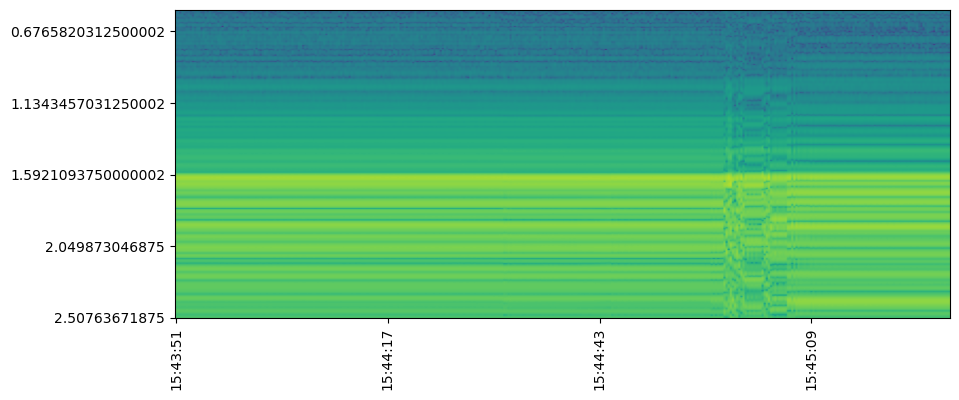

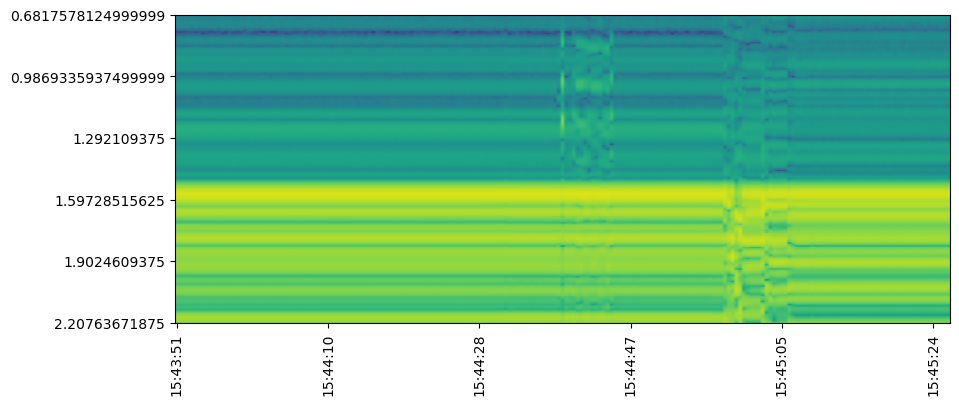

In [11]:
f = 'kuka_stare_decon_Ka-Scat20230807-154351.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230807-154351.nc'

plot_file(f,'ku')

In [12]:
pitno = 1
pits[pitno] = {}
pits[pitno]['ka'] = ((15,45,15),(15,45,20))
pits[pitno]['ku'] = ((15,44,0),(15,44,10))
pits[pitno]['file'] = f

# PIT 5

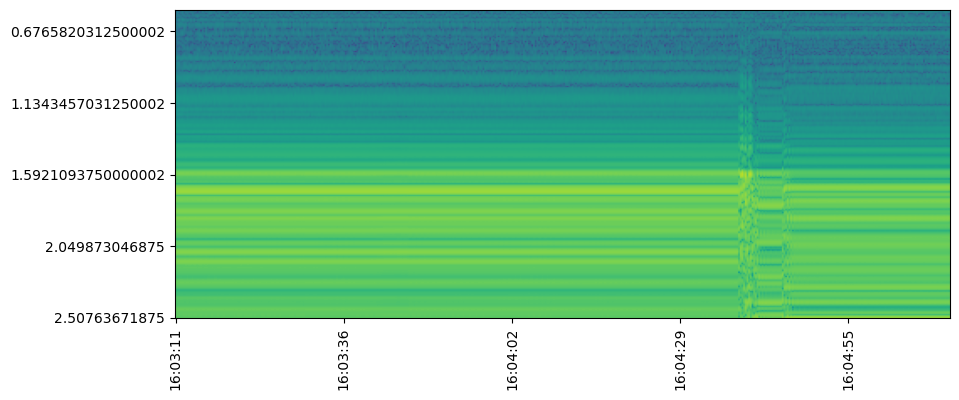

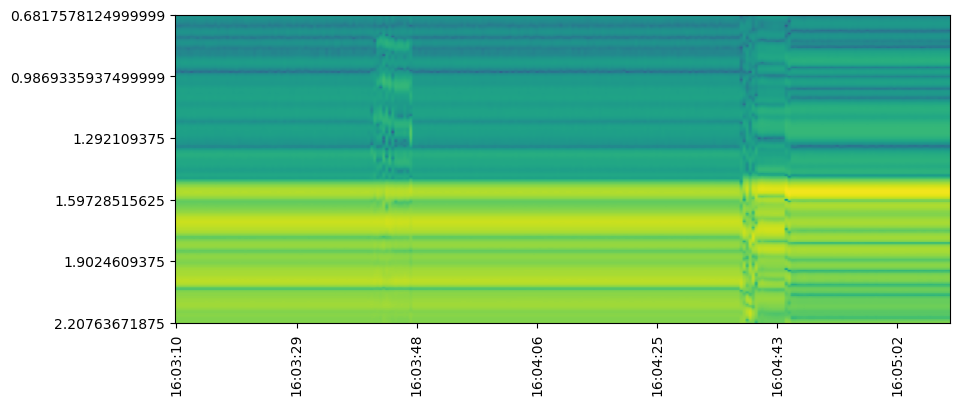

In [13]:
f = 'kuka_stare_decon_Ka-Scat20230807-160311.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230807-160310.nc'

plot_file(f,'ku')

In [14]:
pitno=5
pits[pitno] = {}
pits[pitno]['ka'] = ((16,4,50),(16,5,0))
pits[pitno]['ku'] = ((16,3,11),(16,3,21))
pits[pitno]['file'] = f

# PIT 2

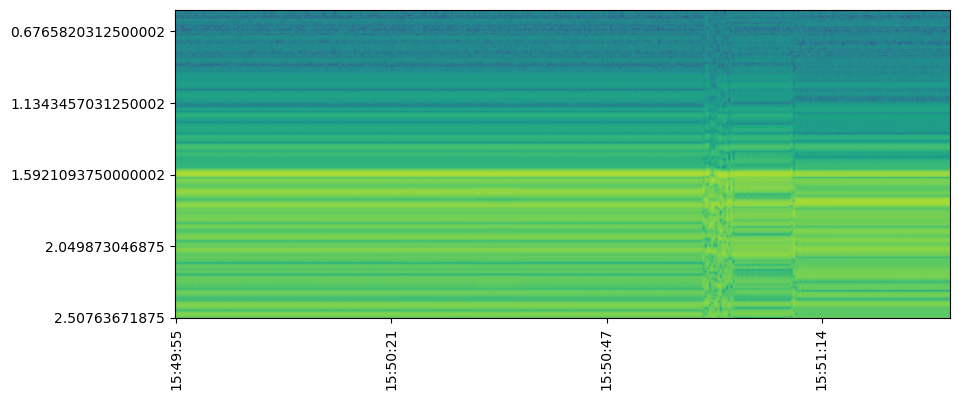

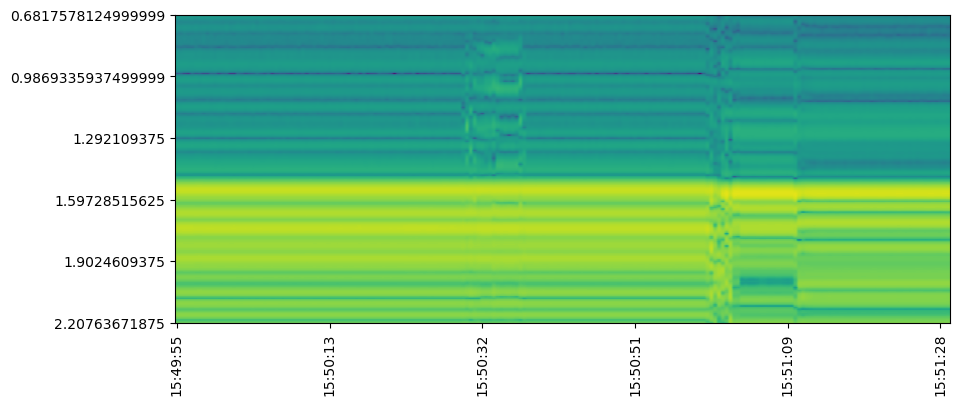

In [16]:
f = 'kuka_stare_decon_Ka-Scat20230807-154955.nc'

plot_file(f,'ka')

f = 'kuka_stare_decon_Ku-Scat20230807-154955.nc'

plot_file(f,'ku')

In [17]:
pitno=2
pits[pitno] = {}
pits[pitno]['ku'] = ((15,50,0),(15,50,10))
pits[pitno]['ka'] = ((15,51,15),(15,51,25))
pits[pitno]['file'] = f

In [18]:
pickle.dump(pits,open('../data/pickles/kuka_pits.p','wb'))